# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [1]:
# Importing the libraries 
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.datasets import load_boston
boston_dataset = load_boston()



### Load the dataset

In [2]:
# loading the Boston Housing dataset
cData =pd.read_csv("boston.csv")


### Check the shape of the dataset

In [4]:
#Check the shape of dataframe
print(f'there are {cData.shape[0]}rows and {cData.shape[1]}colums.')
np.random.seed(0)
cData.sample(n=10)


there are 506rows and 13colums.


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,7.34,22.6
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,9.53,50.0
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,10.50,23.0
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,19.77,8.3
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,12.34,21.2
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,8.47,19.9
487,4.83567,0.0,18.10,0,0.583,5.905,53.2,3.1523,24,666,20.2,11.45,20.6
340,0.06151,0.0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,9.29,18.7
310,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,12.64,16.1
102,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,10.63,18.6


### Get the info regarding column datatypes

In [5]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Get summary statistics for the numerical columns

In [6]:
# Viewing the data statistics
cData.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

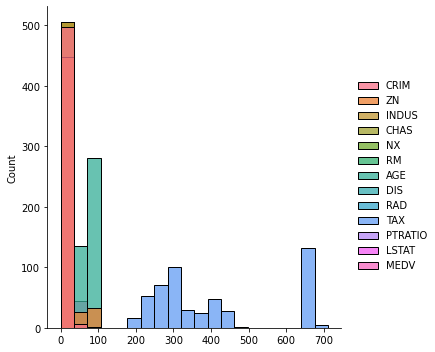

In [7]:
#Plot the distribution plots for all the numerical features 
sns.displot(cData,bins=20)
plt.show()

positively skewed :In statistics, a positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer. 

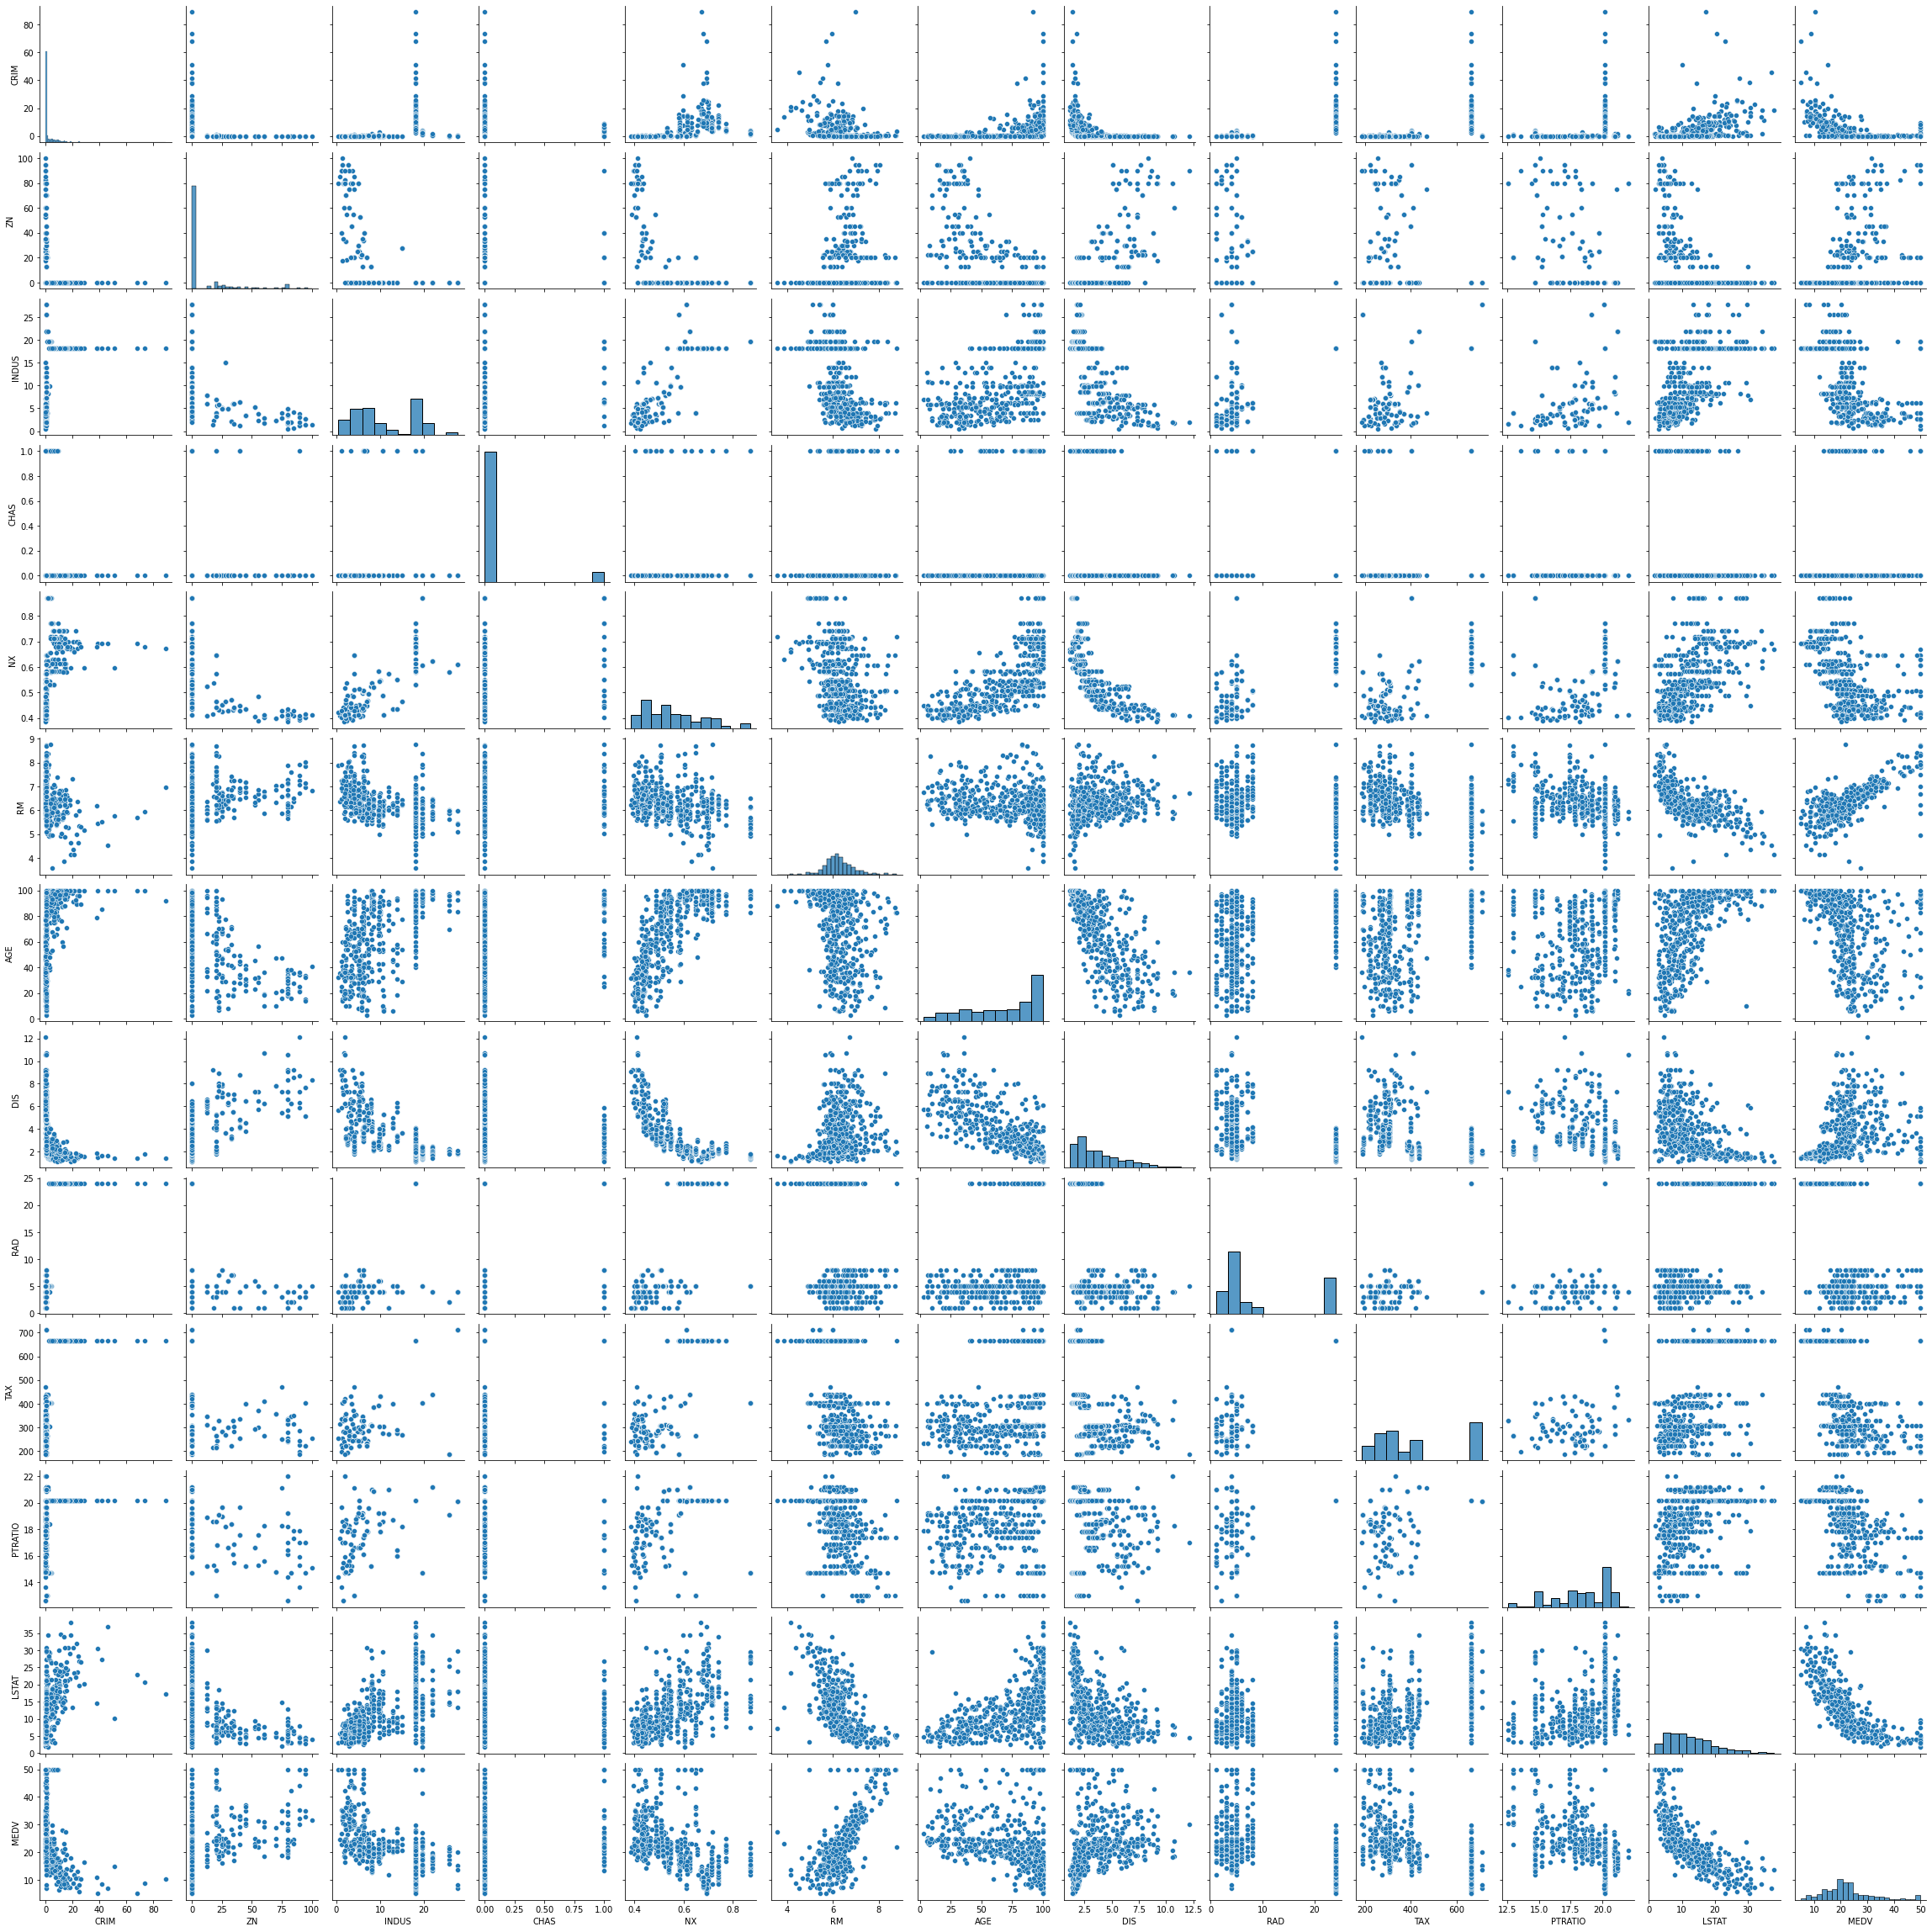

In [8]:
#Plot the scatterplots for features and the target variable MEDV
sns.pairplot(cData)
plt.show()

To visualize how each factor would affect housing rate, we can run a scatter plot of the housing rate for each dependent variable. This will help visualize how the target vector may be affected by each factor.

The MEDV increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
The MEDV tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

In [9]:
# Finding out the correlation between the features
corr = cData.corr()
corr.shape

(13, 13)

<AxesSubplot:>

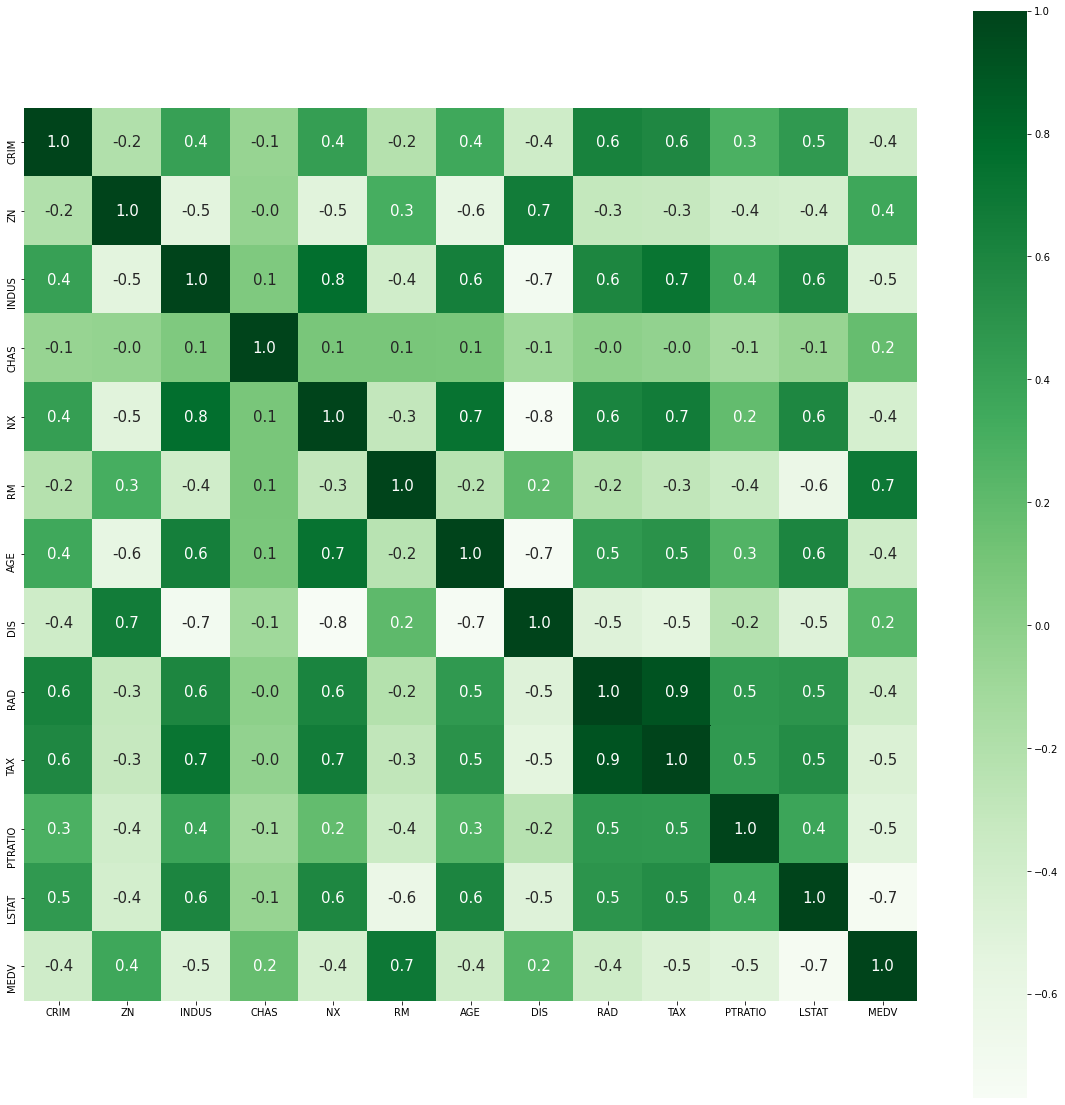

In [10]:
#Plot the correlation heatmap 
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

The variable MEDV has a positive relationship with RM but a negative relationship with LSTAT, while the veriable LSTAT has a positive relationship with NX,INDUS,AGE but a negative relationship with MEDV.

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [11]:
# Spliting target variable and independent variables
X = cData.drop(['MEDV'], axis = 1)
y = cData['MEDV']

In [12]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

### Model Building

**Fit the model to the training set**

In [13]:
training_model=LinearRegression().fit(X_train,y_train)

**Get the score on training set**

In [14]:

training_model.score(X_train,y_train)

0.7392552026921005

**Get the score on test set**

In [15]:
test_model=LinearRegression().fit(X_test,y_test)
training_model.score(X_test,y_test)

0.7073118203603468

**Get the RMSE on test set**

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
actual=y_test
predicted = test_model.predict(X_test)
rms=mean_squared_error(actual,predicted,squared=False)
print(rms)

5.118250929373349


**Get the model coefficients.**

In [19]:
training_model.coef_

array([-1.23661145e-01,  5.62093365e-02, -1.94711110e-02,  4.86593800e+00,
       -1.54125487e+01,  3.13197816e+00, -5.25108150e-04, -1.57289311e+00,
        3.00788717e-01, -1.42511148e-02, -7.71367833e-01, -5.53535982e-01])